# Notebook with Various Illustrations into Papers

In [3]:
%pip install --upgrade --editable ..

%load_ext autoreload
%autoreload 2
import mglyph as mg

Obtaining file:///home/vojtech/WORK/Glyphs/pip_test/mglyph
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for mglyph (pyproject.toml) ... done
  Created wheel for mglyph: filename=mglyph-1.0.0-0.editable-py3-none-any.whl size=3686 sha256=9e352bee078571ecec3c76e5c15f5d5493d7cdfc4d0de5161b94591d4c357518
  Stored in directory: /tmp/pip-ephem-wheel-cache-1su9zns6/wheels/d0/62/08/c5c27670bfddce51bcf0534d1da5ac159bb6eede42d941e50a
Successfully built mglyph
  Attempting uninstall: mglyph
    Found existing installation: mglyph 1.0.0
    Uninstalling mglyph-1.0.0:
      Successfully uninstalled mglyph-1.0.0
Note: you may need to restart the kernel to use updated packages.


## Siplest Glyphs that were there in the beginning

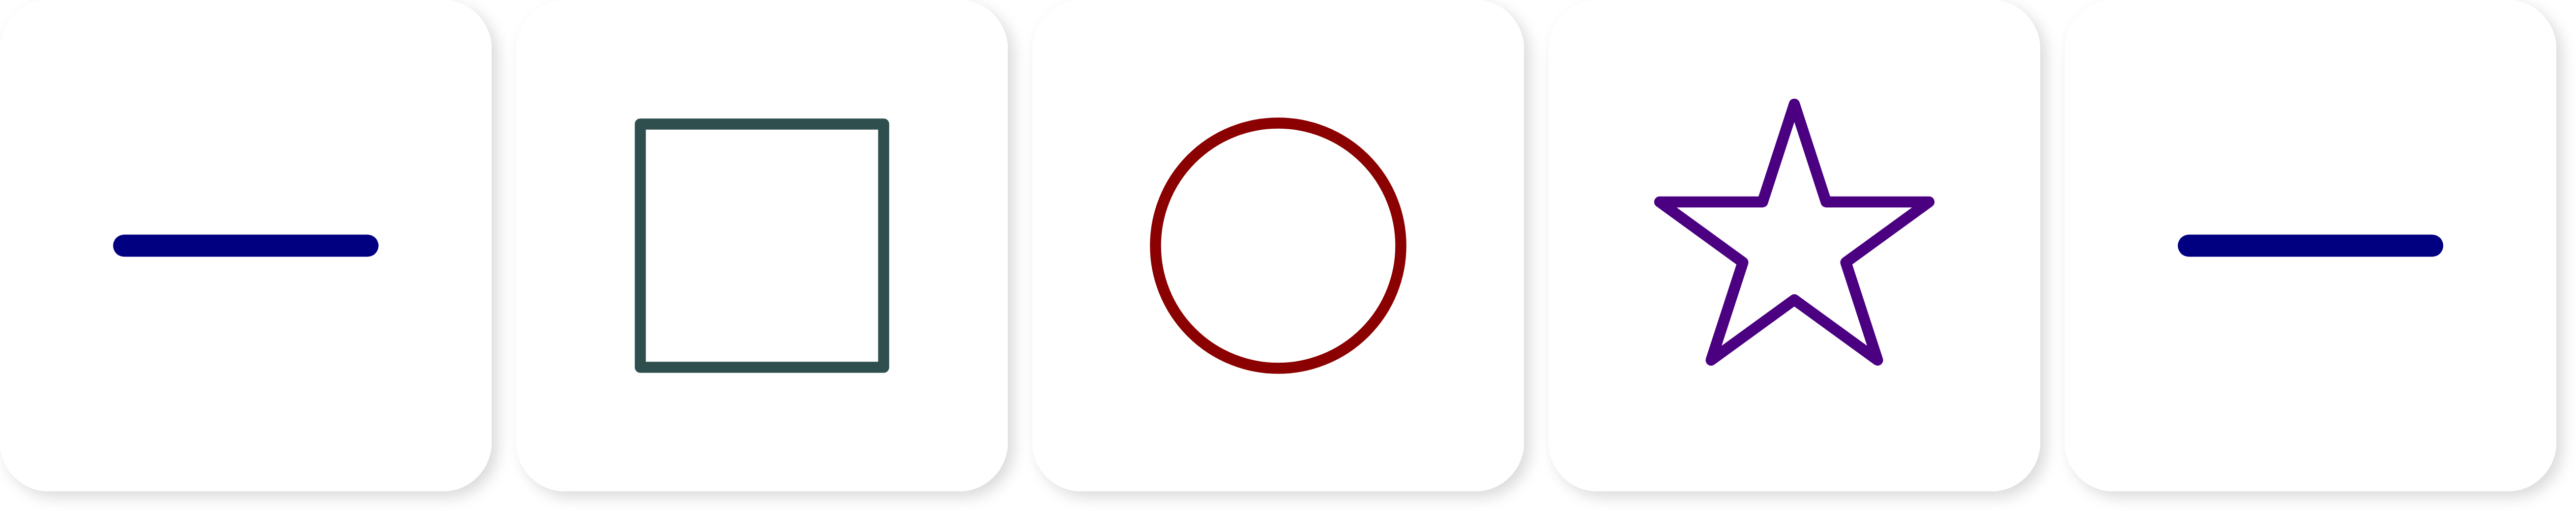

In [10]:
import math

def simple_line(x: float, canvas:mg.Canvas) -> None:
    canvas.line((mg.lerp(x, 0, -1), 0), (mg.lerp(x, 0, 1), 0),
                width='50p', color='navy', linecap='round')
# mg.show(simple_line, x=[55], values=False, scale=10)


def simple_scaled_square(x: float, canvas: mg.Canvas) -> None:
  top = mg.lerp(x, canvas.ycenter, canvas.ytop)
  bottom = mg.lerp(x, canvas.ycenter, canvas.ybottom)
  left = mg.lerp(x, canvas.xcenter, canvas.xleft)
  right = mg.lerp(x, canvas.xcenter, canvas.xright)
  canvas.polygon([(left, top), (right, top), (right, bottom), (left, bottom)], 
                 width='25p', linejoin='round', color='darkslategray', style='stroke')
# mg.show(simple_scaled_square, x=[55], values=False, scale=10)


def simple_scaled_circle(x: float, canvas: mg.Canvas) -> None:
    canvas.circle(canvas.center, mg.lerp(x, 0.01, 1), color='darkred', style='stroke', width='25p')
# mg.show(simple_scaled_circle, x=[55], values=False, scale=10)


def simple_scaled_star(x: float, canvas: mg.Canvas) -> None:
    # canvas.tr.translate(0, mg.lerp(x, 0, 0.05))
    radius = mg.lerp(x, 0.2, canvas.ysize/2)
    vertices = []
    for segment in range(5):
        vertices.append(mg.orbit(canvas.center, segment * 2*math.pi/5, radius))
        vertices.append(mg.orbit(canvas.center, (segment + 0.5) * 2*math.pi/5, math.cos(2*math.pi/5)/math.cos(math.pi/5) * radius))
    canvas.polygon(vertices, linejoin='round', color='indigo', style='stroke', width='25p')
# mg.show(simple_scaled_star, x=[55], values=False, scale=10)

mg.show([simple_line, simple_scaled_square, simple_scaled_circle, simple_scaled_star, simple_line], x=[55]*5, values=False, scale=10, margin=['0%','4%','4%','0%'])


## One-Handed Clock

In [ ]:
def one_handed_clock(x: float, canvas: mg.Canvas) -> None:
  canvas.circle(canvas.center, radius=canvas.ysize/30, color='darkslategray', style='stroke', width='20p')
  angle = -x/100 * 2*math.pi
  canvas.line(mg.orbit(canvas.center, angle+math.pi, 0.18 * canvas.ysize/2),
              mg.orbit(canvas.center, angle, 1.0*canvas.ysize/2),  
              width='10p', linecap='round', color='maroon')

def one_handed_clock_with_hticks(x: float, canvas: mg.Canvas) -> None:
  for hour in range(12):
    canvas.line(mg.orbit(canvas.center, hour*math.pi/6, 0.8 * canvas.ysize/2),
                mg.orbit(canvas.center, hour*math.pi/6, canvas.ysize/2),
                         linecap='round', color=(0,0,0.5), width='38p')
    canvas.line(mg.orbit(canvas.center, hour*math.pi/6, 0.8 * canvas.ysize/2),
                mg.orbit(canvas.center, hour*math.pi/6, canvas.ysize/2),
                         linecap='round', color='white', width='31p')
  one_handed_clock(x, canvas)

def one_handed_clock_with_mticks(x: float, canvas: mg.Canvas) -> None:
  for minute in range(60):
    canvas.line(mg.orbit(canvas.center, minute*math.pi/30, 0.88*canvas.ysize/2),
                mg.orbit(canvas.center, minute*math.pi/30, 1.0*canvas.ysize/2), 
                width='5p', linecap='round', color='black')
  one_handed_clock_with_hticks(x, canvas)

mg.show(one_handed_clock_with_hticks, scale=10,
        x=[5, 25, 50, 75, 95])
mg.show(one_handed_clock, scale=10, values=False,
        x=[20, 21, 22, 23, 24])
mg.show(one_handed_clock_with_mticks, scale=10,
        x=[20, 21, 22, 23, 24])

## Dots -- Illegal and Legal

In [ ]:
def hundred_dots(x: float, canvas: mg.Canvas) -> None:
    base = 10
    for row in range(base):
        for col in range(base):
            if (row*base + col) <= mg.lerp(x, 0, base**2):
                canvas.circle(((col/(base-1))*canvas.xsize+canvas.xleft, (row/(base-1))*canvas.ysize+canvas.ytop),
                    radius=canvas.ysize*0.021, color='midnightblue')
            else:
                canvas.circle(((col/(base-1))*canvas.xsize+canvas.xleft, (row/(base-1))*canvas.ysize+canvas.ytop),
                    radius=canvas.ysize*0.009, color='lightslategray')
mg.show(hundred_dots, scale=10, values=False, x=[5, 25, 50, 52, 54])


from scipy.stats import qmc
def halton_sequence(x: float, canvas: mg.Canvas) -> None:
    sampler = qmc.Halton(d=2, scramble=False)
    sampler.fast_forward(1)
    n = int(mg.lerp(x, 0, 1500))
    points = sampler.random(n=n)
    for i, point in zip(range(n), points):
        canvas.circle((point[0]*canvas.xsize+canvas.xleft, point[1]*canvas.ysize+canvas.ytop),
                      radius=canvas.ysize*0.013, color='midnightblue')
mg.show(halton_sequence, scale=10, x=[5, 25, 50, 52, 54])

## Composite Glyphs

In [ ]:
from IPython.display import display, HTML

def cubic_bezier_point(t:float, a:float, b:float, c:float, d:float) -> (float, float):
    p0 = 0.0  # Start in time (t=0)
    p3 = 1.0  # End in time (t=1)
    x = (1 - t)**3 * p0 + 3 * (1 - t)**2 * t * a + 3 * (1 - t) * t**2 * c + t**3 * p3
    y = (1 - t)**3 * p0 + 3 * (1 - t)**2 * t * b + 3 * (1 - t) * t**2 * d + t**3 * p3
    return x, y

# Bisection method for numerical discovery of t for given x
def cubic_bezier_find_t_for_x(x_target:float, a:float, c:float, epsilon:float=1e-6):
    left, right = 0.0, 1.0
    while right - left > epsilon:
        mid = (left + right) / 2
        x_mid, _ = cubic_bezier_point(mid, a, 0, c, 1)  # Just for the x value
        if x_mid < x_target:
            left = mid
        else:
            right = mid
    return (left + right) / 2

# Function that gets the cubic bezier value y for a given x
def mg_cubic_bezier_for_x(x_target:float, a:float, b:float, c:float, d:float):
    t = cubic_bezier_find_t_for_x(x_target, a, c)
    _, y = cubic_bezier_point(t, a, b, c, d)
    return y

def mg_ease(x: float, fraction: float):
    return 100*mg_cubic_bezier_for_x(x/100, fraction, 0, fraction, 1)

def mg_clamped_linear(x: float, x_start, x_end):
    if x < x_start:
        return 0
    elif x > x_end:
        return 100
    else:
        return 100 * (x - x_start) / (x_end - x_start)

def composite_four_circles(x: float, canvas: mg.Canvas) -> None:
  canvas.circle((-0.5, -0.5), mg.lerp(mg_ease(x, 0), 0.01, canvas.ysize/4),
                color='#1f77b4', style='stroke', width='18p')
  canvas.circle(( 0.5, -0.5), mg.lerp(100*mg_cubic_bezier_for_x(x/100, 1/3, 0, 1/4, 1), 0.01, canvas.ysize/4),
                color='#ff7f0e', style='stroke', width='18p')
  canvas.circle((-0.5,  0.5), mg.lerp(100*mg_cubic_bezier_for_x(x/100, 3/4, 0, 2/3, 1), 0.01, canvas.ysize/4),
                color='#2ca02c', style='stroke', width='18p')
  canvas.circle(( 0.5,  0.5), mg.lerp(mg_ease(x, 1), 0.01, canvas.ysize/4),
                color='#d62728', style='stroke', width='18p')

def composite_four_circles_linear(x: float, canvas: mg.Canvas) -> None:
  canvas.circle((-0.5, -0.5), mg.lerp(mg_clamped_linear(x, 0, 25), 0.01, canvas.ysize/4),
                color='#1f77b4', style='stroke', width='18p')
  canvas.circle(( 0.5, -0.5), mg.lerp(mg_clamped_linear(x, 25, 50), 0.01, canvas.ysize/4),
                color='#ff7f0e', style='stroke', width='18p')
  canvas.circle((-0.5,  0.5), mg.lerp(mg_clamped_linear(x, 50, 75), 0.01, canvas.ysize/4),
                color='#2ca02c', style='stroke', width='18p')
  canvas.circle(( 0.5,  0.5), mg.lerp(mg_clamped_linear(x, 75, 100), 0.01, canvas.ysize/4),
                color='#d62728', style='stroke', width='18p')

mg.show(composite_four_circles, scale=10, values=False,
        x=[5, 30, 60, 62, 64]) 
mg.show(composite_four_circles_linear, scale=10,
        x=[5, 30, 60, 62, 64]) 

display(HTML("<h3>Simple Scaled Circle – for reference</h3>"))
mg.show(simple_scaled_circle, x=[[20, 21, 22, 23, 24],
                                   [40, 41, 42, 43, 44],
                                   [50, 51, 52, 53, 54]])
display(HTML("<h3>Composite Four Circles – with cubic bezier scaling</h3>"))
mg.show(composite_four_circles, x=[[20, 21, 22, 23, 24],
                                   [40, 41, 42, 43, 44],
                                   [50, 51, 52, 53, 54]])
display(HTML("<h3>Composite Four Circles – with linear scaling</h3>"))
mg.show(composite_four_circles_linear, x=[[20, 21, 22, 23, 24],
                                          [40, 41, 42, 43, 44],
                                          [50, 51, 52, 53, 54]])

## Corresponding plots

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 100, 256)

def show_cubic_bezier(axis, a, b, c, d):
    y = list(map(lambda x: 100*mg_cubic_bezier_for_x(x/100, a, b, c, d), x))
    axis.plot(x, y, label=f'cubic-bezier({a}, {b}, {c}, {d})')

def show_clamped_linear(axis, x_start, x_end):
    y = list(map(lambda x: mg_clamped_linear(x, x_start, x_end), x))
    axis.plot(x, y, label=f'clamped-linear({x_start}, {x_end})')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,2), layout='constrained')

show_cubic_bezier(ax1, 0, 0, 0, 1)
show_cubic_bezier(ax1, 1/3, 0, 1/4, 1)
show_cubic_bezier(ax1, 3/4, 0, 2/3, 1)
show_cubic_bezier(ax1, 1, 0, 1, 1)
ax1.set(xlabel="Input $x$ value", ylabel='Modified $x$ value', title="Cubic-Bézier")
ax1.grid(True)

show_clamped_linear(ax2, 0, 25)
show_clamped_linear(ax2, 25, 50)
show_clamped_linear(ax2, 50, 75)
show_clamped_linear(ax2, 75, 100)
ax2.set(xlabel="Input $x$ value", ylabel=None, title="Linear")
ax2.grid(True)
plt.savefig("composite-phasing-plots-x.pdf", format='pdf', bbox_inches='tight')
plt.show()


## Progress bar

In [ ]:
def progress_bar(x: float, canvas: mg.Canvas) -> None:
  for i in range(10):
    canvas.line((mg.lerp(10*i, -1, 1), -0.1), (mg.lerp(10*i, -1, 1), 0.1), color='darkgray', width='5p')
    canvas.line((mg.lerp(10*i+5, -1, 1), -0.05), (mg.lerp(10*i+5, -1, 1), 0.05), color='silver', width='5p')
  canvas.rounded_rect((-1, -0.2), (mg.lerp(x, -1, 1), 0.2), 0.04, 0.04, style='fill', color='cornflowerblue')
  canvas.rounded_rect((-1.01, -0.2), (1.01, 0.2), 0.04, 0.04, style='stroke', color='midnightblue', width='15p')

mg.show(progress_bar, scale=10, x=[7]) 
mg.show(progress_bar, scale=10, x=[66.6667]) 
mg.show(simple_scaled_star, scale=10, x=[66.6667])


## Shepard Glyph

In [ ]:
def shepard_circle(x: float, canvas: mg.Canvas) -> None:
  base_radius = mg.lerp(x, canvas.ysize/4, canvas.ysize/2)
  base_width = mg.lerp(x, canvas.ysize/100, canvas.ysize/50)
  print(base_width)
  for r in [2, 1, 1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256]:
    #canvas.circle(canvas.center, r*base_radius, style='stroke', color='saddlebrown', width=(r+0.2)*base_width)
    canvas.circle(canvas.center, r*base_radius, style='stroke', color='saddlebrown', width='15p')

mg.show(shepard_circle, scale=10, x=[0, 25, 50, 75, 100])